# Library

In [ ]:
import datetime
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Load Datasets

Datasets: [Tesla, Inc. (TSLA) - Yahoo Finance](https://finance.yahoo.com/quote/TSLA/history?period1=1277856000&period2=1703980800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

In [ ]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3395,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
3396,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
3397,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
3398,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900


Open, High, Low, Close, Adjusted Close, dan Volume adalah parameter-parameter yang digunakan untuk merepresentasikan data pergerakan harga saham pada suatu periode tertentu. Berikut adalah penjelasan singkat masing-masing parameter:

1. **Open (O)**: Harga saham pada saat pembukaan perdagangan pada suatu periode tertentu. Ini adalah harga pertama pada periode tersebut.

2. **High (H)**: Harga tertinggi yang dicapai oleh saham selama periode tertentu. Ini mencerminkan nilai maksimum yang dicapai oleh harga saham selama periode tersebut.

3. **Low (L)**: Harga terendah yang dicapai oleh saham selama periode tertentu. Ini mencerminkan nilai minimum yang dicapai oleh harga saham selama periode tersebut.

4. **Close (C)**: Harga saham pada saat penutupan perdagangan pada suatu periode tertentu. Ini adalah harga terakhir pada periode tersebut.

5. **Adjusted Close (Adj Close)**: Harga penutupan yang disesuaikan dengan perubahan dividen atau aksi korporasi lainnya. Ini memberikan gambaran yang lebih akurat tentang kinerja saham dari waktu ke waktu, karena memperhitungkan faktor-faktor yang dapat memengaruhi harga saham.

6. **Volume**: Jumlah total saham yang diperdagangkan selama periode tertentu. Ini mencerminkan seberapa likuid saham tersebut, yaitu sejauh mana saham tersebut diperdagangkan di pasar.

Data ini sering disajikan dalam bentuk grafik candlestick, yang memberikan gambaran visual tentang pergerakan harga saham dan volume perdagangan selama periode tertentu. Analisis teknikal sering menggunakan informasi ini untuk membuat keputusan investasi.

# Preprocessing

In [ ]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3395,2023-12-22,252.539993
3396,2023-12-26,256.609985
3397,2023-12-27,261.440002
3398,2023-12-28,253.179993


In [ ]:
df['Date']

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
3395    2023-12-22
3396    2023-12-26
3397    2023-12-27
3398    2023-12-28
3399    2023-12-29
Name: Date, Length: 3400, dtype: object

In [ ]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2010-06-30')
datetime_object

datetime.datetime(2010, 6, 30, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-30-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3395   2023-12-22
3396   2023-12-26
3397   2023-12-27
3398   2023-12-28
3399   2023-12-29
Name: Date, Length: 3400, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3400 non-null   datetime64[ns]
 1   Close   3400 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.2 KB


In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2023-12-22,252.539993
2023-12-26,256.609985
2023-12-27,261.440002


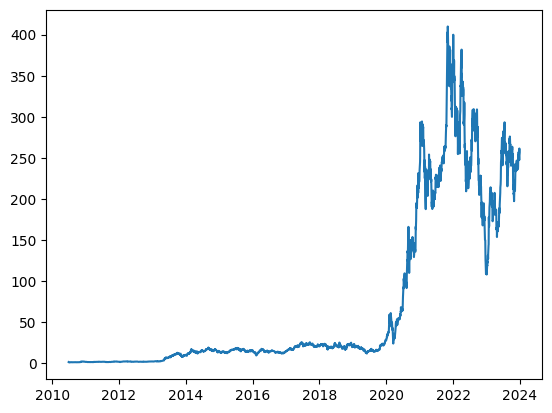

In [ ]:
plt.plot(df.index, df['Close'])

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2010-07-02',
                                '2023-12-29',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2010-07-02,1.592667,1.588667,1.464000,1.280000
1,2010-07-06,1.588667,1.464000,1.280000,1.074000
2,2010-07-07,1.464000,1.280000,1.074000,1.053333
3,2010-07-08,1.280000,1.074000,1.053333,1.164000
4,2010-07-09,1.074000,1.053333,1.164000,1.160000
...,...,...,...,...,...
3392,2023-12-22,257.220001,247.139999,254.500000,252.539993
3393,2023-12-26,247.139999,254.500000,252.539993,256.609985
3394,2023-12-27,254.500000,252.539993,256.609985,261.440002
3395,2023-12-28,252.539993,256.609985,261.440002,253.179993


# Datasets Splitting

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates)), middle_matrix.shape[1], 1)

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

In [ ]:
dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((3397,), (3397, 3, 1), (3397,))

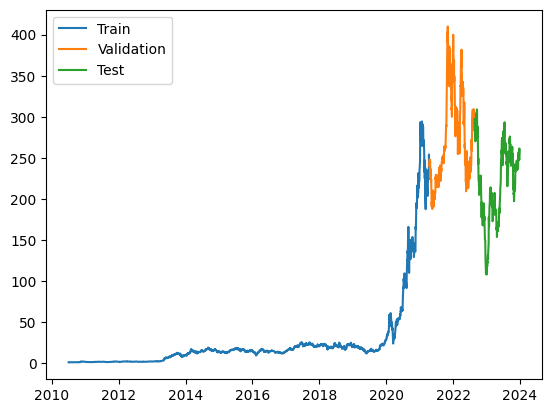

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

# LSTM

In [ ]:
%%time
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
85/85 [==============================] - 4s 14ms/step - loss: 2573.9924 - mean_absolute_error: 20.3578 - val_loss: 59356.5117 - val_mean_absolute_error: 237.5181
Epoch 2/100
85/85 [==============================] - 1s 7ms/step - loss: 821.5937 - mean_absolute_error: 6.9957 - val_loss: 10643.4619 - val_mean_absolute_error: 88.2117
Epoch 3/100
85/85 [==============================] - 1s 6ms/step - loss: 57.5828 - mean_absolute_error: 2.3342 - val_loss: 3433.0735 - val_mean_absolute_error: 41.6402
Epoch 4/100
85/85 [==============================] - 0s 4ms/step - loss: 24.1131 - mean_absolute_error: 1.8283 - val_loss: 2515.7520 - val_mean_absolute_error: 35.0051
Epoch 5/100
85/85 [==============================] - 0s 5ms/step - loss: 16.0086 - mean_absolute_error: 1.5342 - val_loss: 2470.4814 - val_mean_absolute_error: 39.4414
Epoch 6/100
85/85 [==============================] - 1s 8ms/step - loss: 13.3119 - mean_absolute_error: 1.4437 - val_loss: 1623.5509 - val_mean_absolute

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Evaluation

85/85 [==============================] - 2s 6ms/step


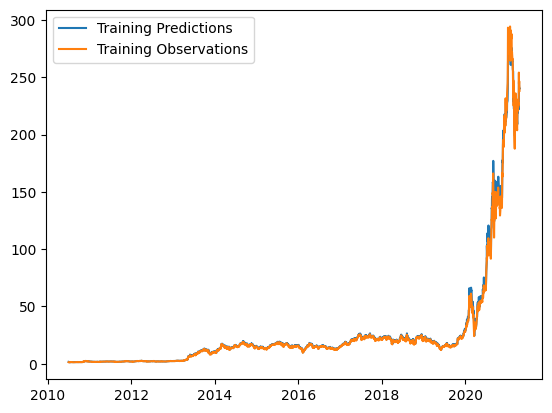

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

11/11 [==============================] - 0s 14ms/step


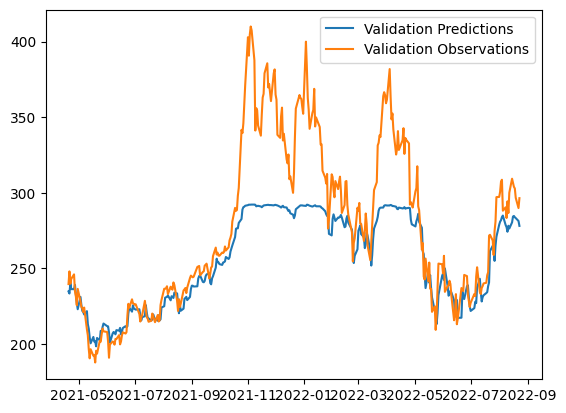

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

11/11 [==============================] - 0s 4ms/step


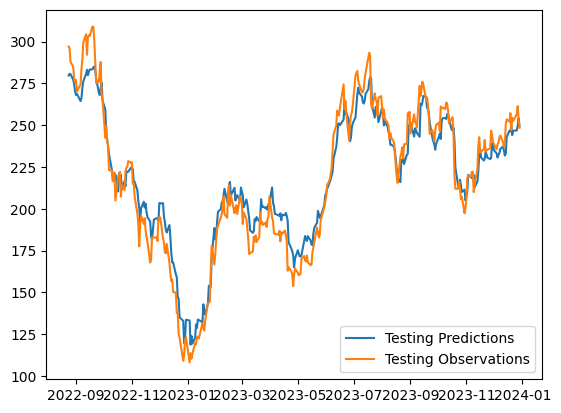

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

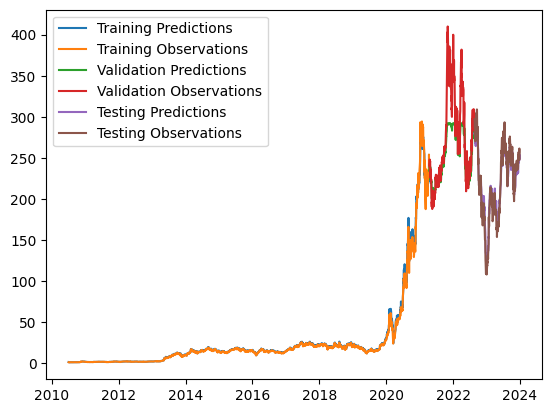

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
recursive_predictions = []
recursive_dates = dates_test[-14:]
last_window  = X_test[-14]

for target_date in recursive_dates:
    print(last_window)
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    new_window = list(last_window[1:])
    new_window.append(next_prediction)
    new_window = np.array(new_window)
    last_window = new_window

[[239.37]
 [242.64]
 [243.84]]
1/1 [==============================] - 0s 27ms/step
[[242.64   ]
 [243.84   ]
 [237.32747]]
1/1 [==============================] - 0s 32ms/step
[[243.84   ]
 [237.32747]
 [233.26332]]
1/1 [==============================] - 0s 28ms/step
[[237.32747]
 [233.26332]
 [228.84886]]
1/1 [==============================] - 0s 27ms/step
[[233.26332]
 [228.84886]
 [225.24847]]
1/1 [==============================] - 0s 31ms/step
[[228.84886]
 [225.24847]
 [222.40477]]
1/1 [==============================] - 0s 29ms/step
[[225.24847]
 [222.40477]
 [220.37988]]
1/1 [==============================] - 0s 29ms/step
[[222.40477]
 [220.37988]
 [219.05418]]
1/1 [==============================] - 0s 25ms/step
[[220.37988]
 [219.05418]
 [218.24693]]
1/1 [==============================] - 0s 42ms/step
[[219.05418]
 [218.24693]
 [217.78235]]
1/1 [==============================] - 0s 27ms/step
[[218.24693]
 [217.78235]
 [217.5258 ]]
1/1 [==============================] - 0s 30ms/st

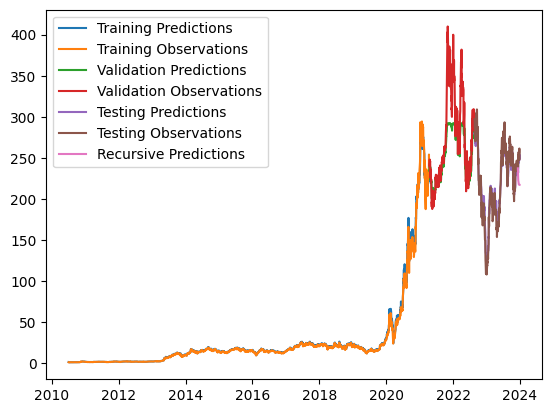

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

# Export Model

In [ ]:
# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model.save("my_model.keras")

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model.keras")
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
